In [ ]:
# Connect Driver
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
from pyarrow import csv
import pyarrow.parquet as pq
import glob
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random
import matplotlib.pyplot as plt
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D, GRU
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc, average_precision_score, f1_score
from sklearn.model_selection import train_test_split # Corrected import statement


#Đọc file và chia tỉ lệ
Không sử dụng


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MLinCybersecurity/train.csv")

In [ ]:
# Đếm số lượng giá trị duy nhất trong cột 'label'
unique_label_count = data['Label'].nunique()

print(f"Số lượng giá trị duy nhất trong cột 'label': {unique_label_count}")

Số lượng giá trị duy nhất trong cột 'label': 34


In [ ]:
#data.info()
# Tính tỷ lệ các giá trị
ratios = data["Label"].value_counts(normalize=True)
print(ratios)

Label
MITM-ArpSpoofing           0.043207
DDoS-TCP_Flood             0.043182
Recon-HostDiscovery        0.043146
DoS-UDP_Flood              0.043146
DDoS-ICMP_Fragmentation    0.043135
BenignTraffic              0.043120
DoS-TCP_Flood              0.043120
Mirai-greip_flood          0.043099
DDoS-SYN_Flood             0.043099
DDoS-PSHACK_Flood          0.043099
DDoS-ACK_Fragmentation     0.043084
Mirai-greeth_flood         0.043084
DDoS-SynonymousIP_Flood    0.043084
DoS-SYN_Flood              0.043058
DDoS-RSTFINFlood           0.043048
DDoS-UDP_Flood             0.043023
DDoS-UDP_Fragmentation     0.043017
DNS_Spoofing               0.042946
Mirai-udpplain             0.042894
DDoS-ICMP_Flood            0.042864
Recon-OSScan               0.035690
Recon-PortScan             0.029900
DoS-HTTP_Flood             0.025962
VulnerabilityScan          0.013527
DDoS-HTTP_Flood            0.010430
DDoS-SlowLoris             0.008497
DictionaryBruteForce       0.004723
BrowserHijacking      

In [ ]:
data_50, data_50_1  = train_test_split(
    data,
    test_size=0.5,  # 10% cho tập test
    stratify=data['Label'],  # Chia theo cột 'target'
    random_state=45  # Đảm bảo kết quả nhất quán
)
data_50.to_csv('train_data_50.csv', index=False,header=True)

#Đọc file_Train

In [ ]:
CSV_HEADER =[ "ID", "flow_duration", "Header_Length", "Protocol type", "Duration", "Rate", "Srate", "Drate", "fin_flag_number",
    "syn_flag_number", "rst_flag_number", "psh_flag_number", "ack_flag_number", "ece_flag_number", "cwr_flag_number",
    "ack_count", "syn_count", "fin_count", "urg_count", "rst_count", "HTTP", "HTTPS", "DNS", "Telnet", "SMTP", "SSH", "IRC", "TCP",
    "UDP", "DHCP", "ARP", "ICMP", "IPv", "LLC", "Tot sum", "Min", "Max", "AVG", "Std", "Tot size", "IAT", "Number", "Magnitue",
    "Radius", "Covariance", "Variance", "Weight"] # drop column ID

CSV_HEADER_WITH_LABEL = [ "ID", "flow_duration", "Header_Length", "Protocol type", "Duration", "Rate", "Srate", "Drate", "fin_flag_number",
    "syn_flag_number", "rst_flag_number", "psh_flag_number", "ack_flag_number", "ece_flag_number", "cwr_flag_number",
    "ack_count", "syn_count", "fin_count", "urg_count", "rst_count", "HTTP", "HTTPS", "DNS", "Telnet", "SMTP", "SSH", "IRC", "TCP",
    "UDP", "DHCP", "ARP", "ICMP", "IPv", "LLC", "Tot sum", "Min", "Max", "AVG", "Std", "Tot size", "IAT", "Number", "Magnitue",
    "Radius", "Covariance", "Variance", "Weight", "Label" ] #drop column ID

#Preprogressing Dataset


##Xử lý tập Train

In [ ]:
#data = pd.read_csv("/content/drive/MyDrive/MLinCybersecurity/train_data_10.csv")
print(data.shape[1])
data = pd.read_csv("/content/train_data_50.csv")

48


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#data = pd.read_csv("/content/drive/MyDrive/MLinCybersecurity/train_data_10.csv")
data = pd.read_csv("/content/drive/MyDrive/MLinCybersecurity/train.csv")

# 1. Loại bỏ các hàng chứa giá trị NaN hoặc điền giá trị trung bình
data_cleaned = data.fillna(0)  # Hoặc .dropna()


# 2. Mã hóa cột 'Label' (target)
label_encoder = LabelEncoder() # Initialize LabelEncoder
data_cleaned['Label'] = label_encoder.fit_transform(data_cleaned['Label'])
num_classes = len(label_encoder.classes_)
target_strings = label_encoder.inverse_transform(np.arange(num_classes))


# 3. Chia thành X (features) và y (label)
X = data_cleaned.drop(columns=['ID', 'Label'])  # Bỏ cột không cần thiết
y = data_cleaned['Label']

# 4. Chuẩn hóa dữ liệu (StandardScaler)
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.1, random_state=43)

## Xử lý tập test
-- TẬP TEST HIỆN TẠI KHÔNG CÓ NHÃN LABEL

In [ ]:
data_test.info()

In [ ]:
data_test = pd.read_csv("/content/drive/MyDrive/MLinCybersecurity/test.csv")
# 1. Loại bỏ các hàng chứa giá trị NaN hoặc điền giá trị trung bình
data_cleaned_test = data_test.fillna(0)  # Hoặc .dropna()

# 2. Mã hóa cột 'Label' (target)
label_encoder = LabelEncoder() # Initialize LabelEncoder
data_cleaned_test['Label'] = label_encoder.fit_transform(data_cleaned_test['Label'])
target_strings = label_encoder.inverse_transform(np.arange(num_classes))


# 3. Chia thành X (features) và y (label)
X_t = data_cleaned_test.drop(columns=['ID', 'Label'])  # Bỏ cột không cần thiết
y_test = data_cleaned_test['Label']

# 4. Chuẩn hóa dữ liệu (StandardScaler)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_t)


#MODEL TRAIN AND TEST

##RANDOMFOREST TRAIN

Import các thư viện của RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

Train model và lưu dạng Joblib

In [ ]:

# 1. Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Lưu mô hình vào file
joblib.dump(model, 'random_forest_model_ver0-2-full.joblib')

### Print Report Classification_report

In [ ]:
del loaded_model

In [ ]:
# 2. Đánh giá trên tập test
loaded_model = joblib.load('/content/drive/MyDrive/MLinCybersecurity/Model/random_forest_model_ver0-1.joblib')

y_pred = loaded_model.predict(X_test)

# Ánh xạ các chỉ số phân loại thành nhãn gốc
mapped_y_pred = label_encoder.inverse_transform(y_pred)

# Ánh xạ các nhãn thực tế thành nhãn gốc
mapped_y_test = label_encoder.inverse_transform(y_test)

# In báo cáo phân loại (classification report)
report = classification_report(mapped_y_test, mapped_y_pred)
print(report)

                         precision    recall  f1-score   support

       Backdoor_Malware       0.81      0.04      0.08       422
          BenignTraffic       0.38      0.36      0.37     16743
       BrowserHijacking       0.89      0.04      0.08       791
       CommandInjection       0.88      0.24      0.37       812
 DDoS-ACK_Fragmentation       0.99      0.99      0.99     16901
        DDoS-HTTP_Flood       0.98      0.89      0.93      4207
        DDoS-ICMP_Flood       1.00      1.00      1.00     16750
DDoS-ICMP_Fragmentation       0.99      0.98      0.99     16668
      DDoS-PSHACK_Flood       1.00      1.00      1.00     16871
       DDoS-RSTFINFlood       1.00      1.00      1.00     16752
         DDoS-SYN_Flood       0.99      0.90      0.94     16921
         DDoS-SlowLoris       0.83      0.98      0.90      3335
DDoS-SynonymousIP_Flood       0.99      0.95      0.97     16810
         DDoS-TCP_Flood       1.00      0.90      0.95     16819
         DDoS-UDP_Flood 

##XGBOOST


In [ ]:
!pip install xgboost


Import các thư viện của XGBOOST

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

Train model và lưu dạng Joblib

In [ ]:
# Thiết lập các tham số cho XGBoost
params = {
    'objective': 'multi:softmax',  # Hoặc 'multi:softmax' nếu bạn phân loại nhiều lớp
    'ntrees': 10,                    # Số lượng cây trong mô hình
    'max_depth': 9,                  # Chiều sâu tối đa của mỗi cây
    'eta': 0.1,                      # Learning rate (tỷ lệ học)
    'subsample': 0.9,                # Tỷ lệ mẫu (sample rate)
    'gamma': 0.001,                  # Điều chỉnh mức độ tách các nhánh
    'lambda': 1.0,                   # Regularization term cho L2
    'alpha': 1.0,                    # Regularization term cho L1
    'eval_metric': 'logloss',        # Metric để đánh giá trong quá trình huấn luyện
    'random_state': 42               # Đảm bảo tính tái lập kết quả
}
# Khởi tạo mô hình XGBoost
# model_xgb = XGBClassifier(
#     n_estimators=100,  # Số lượng cây
#     learning_rate=0.1,
#     max_depth=6,
#     random_state=42
# )
model_xgb = XGBClassifier(**params)

# Huấn luyện mô hình
model_xgb.fit(X_train, y_train)
# Lưu mô hình vào file
joblib.dump(model_xgb, 'xgboost_model-ver0-2.joblib')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:12:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "ntrees" } are not used.

  warnings.warn(smsg, UserWarning)


['xgboost_model-ver0-2.joblib']

Xem mức độ quan trọng của các features

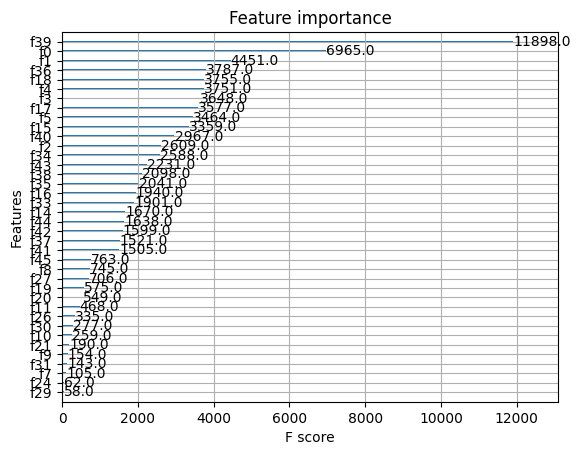

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Vẽ biểu đồ mức độ quan trọng
plot_importance(model_xgb)
plt.show()

### Print Report Classification_report

In [ ]:
del loaded_model

In [ ]:
# 2. Đánh giá trên tập test
loaded_model = joblib.load('/content/xgboost_model-ver0-2.joblib')

y_pred = loaded_model.predict(X_test)

# Ánh xạ các chỉ số phân loại thành nhãn gốc
mapped_y_pred = label_encoder.inverse_transform(y_pred)

# Ánh xạ các nhãn thực tế thành nhãn gốc
mapped_y_test = label_encoder.inverse_transform(y_test)

# In báo cáo phân loại (classification report)
report = classification_report(mapped_y_test, mapped_y_pred)
print(report)

                         precision    recall  f1-score   support

       Backdoor_Malware       0.05      0.11      0.07      2050
          BenignTraffic       0.49      0.28      0.36     75572
       BrowserHijacking       0.00      0.04      0.01      3729
       CommandInjection       0.10      0.33      0.16      3428
 DDoS-ACK_Fragmentation       0.99      0.98      0.99     75685
        DDoS-HTTP_Flood       0.84      0.94      0.89     18366
        DDoS-ICMP_Flood       1.00      1.00      1.00     75136
DDoS-ICMP_Fragmentation       0.85      1.00      0.92     75817
      DDoS-PSHACK_Flood       1.00      1.00      1.00     75718
       DDoS-RSTFINFlood       0.98      1.00      0.99     75552
         DDoS-SYN_Flood       0.71      0.57      0.63     75602
         DDoS-SlowLoris       0.93      0.85      0.89     14901
DDoS-SynonymousIP_Flood       1.00      0.67      0.80     75675
         DDoS-TCP_Flood       0.96      0.67      0.79     75802
         DDoS-UDP_Flood 

##DeepLearning - UNDONE

Import các thư viện của Deeplearning


In [ ]:
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [ ]:
def build_conv1d_model(num_features=80, num_classes=10):
    # Build Conv1D model using Functional API
    inputs = Input(shape=(num_features, 1))
    x = Conv1D(filters=128, kernel_size=3, activation='relu')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)  # classification

    model = Model(inputs=inputs, outputs=outputs)
    return model

Train model và lưu dạng keras

In [ ]:
del model

In [ ]:
# Định nghĩa ReduceLROnPlateau callback
lr_reduction = ReduceLROnPlateau(monitor='val_loss',  # hoặc 'val_accuracy'
                                 patience=3,  # Số epoch chờ đợi trước khi giảm learning rate
                                 verbose=1,
                                 factor=0.5,  # Giảm 50% learning rate
                                 min_lr=1e-6)  # Giới hạn thấp nhất của learning rate

In [ ]:
model = build_conv1d_model(46,34)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 46, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 44, 128)             │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 20, 64)              │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 640)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 34)                  │           2,210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,666 (459.63 KB)

 Trainable params: 117,666 (459.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Train model
model.fit(X_train, y_train, epochs=50, batch_size=512, validation_split=0.01,callbacks=[lr_reduction])
model.save('conv1d_model_v2-100.keras')

Epoch 1/50
3394/3394 ━━━━━━━━━━━━━━━━━━━━ 336s 98ms/step - accuracy: 0.5154 - loss: 1.4582 - val_accuracy: 0.6755 - val_loss: 0.7509 - learning_rate: 1.0000e-04
Epoch 2/50
3394/3394 ━━━━━━━━━━━━━━━━━━━━ 381s 98ms/step - accuracy: 0.6667 - loss: 0.7768 - val_accuracy: 0.6926 - val_loss: 0.7088 - learning_rate: 1.0000e-04
Epoch 3/50
3394/3394 ━━━━━━━━━━━━━━━━━━━━ 385s 99ms/step - accuracy: 0.6831 - loss: 0.7353 - val_accuracy: 0.7020 - val_loss: 0.6854 - learning_rate: 1.0000e-04
Epoch 4/50
3394/3394 ━━━━━━━━━━━━━━━━━━━━ 330s 97ms/step - accuracy: 0.6953 - loss: 0.7120 - val_accuracy: 0.7236 - val_loss: 0.6736 - learning_rate: 1.0000e-04
Epoch 5/50
3394/3394 ━━━━━━━━━━━━━━━━━━━━ 382s 97ms/step - accuracy: 0.7049 - loss: 0.6966 - val_accuracy: 0.7161 - val_loss: 0.6566 - learning_rate: 1.0000e-04
Epoch 6/50
3394/3394 ━━━━━━━━━━━━━━━━━━━━ 385s 98ms/step - accuracy: 0.7160 - loss: 0.6825 - val_accuracy: 0.7405 - val_loss: 0.6429 - learning_rate: 1.0000e-04
Epoch 7/50
3394/3394 ━━━━━━━━━━━━━

### Print Report Classification_report

In [ ]:
del loaded_model

NameError: name 'loaded_model' is not defined

In [ ]:
# 2. Đánh giá trên tập test
loaded_model = load_model('/content/conv1d_model_v2-100.keras')
y_pred_prob = loaded_model.predict(X_test)  # Get predicted probabilities

y_pred = np.argmax(y_pred_prob, axis=1)  # Get predicted labels
# Ánh xạ các chỉ số phân loại thành nhãn gốc
mapped_y_pred = label_encoder.inverse_transform(y_pred)

# Ánh xạ các nhãn thực tế thành nhãn gốc
mapped_y_test = label_encoder.inverse_transform(y_test)

# In báo cáo phân loại (classification report)
report = classification_report(mapped_y_test, mapped_y_pred)
print(report)

6095/6095 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                         precision    recall  f1-score   support

       Backdoor_Malware       0.67      0.06      0.10       215
          BenignTraffic       0.64      0.75      0.69      8404
       BrowserHijacking       0.69      0.11      0.19       415
       CommandInjection       0.76      0.21      0.32       395
 DDoS-ACK_Fragmentation       0.98      0.99      0.98      8385
        DDoS-HTTP_Flood       0.90      0.80      0.84      2061
        DDoS-ICMP_Flood       1.00      1.00      1.00      8291
DDoS-ICMP_Fragmentation       0.99      0.98      0.98      8474
      DDoS-PSHACK_Flood       1.00      1.00      1.00      8485
       DDoS-RSTFINFlood       1.00      1.00      1.00      8377
         DDoS-SYN_Flood       0.93      0.98      0.96      8355
         DDoS-SlowLoris       0.82      0.92      0.87      1619
DDoS-SynonymousIP_Flood       0.99      0.96      0.98      8535
         DDoS-TCP_Flood       0.95      0.99      0.97      8415
         DDoS-UDP_Flood 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten
# Hàm trích xuất thông tin layers
def extract_model_info(model):
    layers_info = []
    for layer in model.layers:
        layer_info = {
            "name": layer.__class__.__name__,
            "input_shape": layer.input_shape if hasattr(layer, 'input_shape') else None,
            "output_shape": layer.output_shape if hasattr(layer, 'output_shape') else None,
            "num_params": layer.count_params(),
            "config": layer.get_config()
        }
        layers_info.append(layer_info)
    return layers_info

# Trích xuất thông tin mô hình
model_info = {
    "model_name": "example_model",
    "layers": extract_model_info(model)
}

# Lưu thông tin vào file JSON
with open("model_layers.json", "w") as json_file:
    json.dump(model_info, json_file, indent=4)

print("Model information saved to model_layers.json")

Model information saved to model_layers.json
